# Medical Embeddings and clinical trial search engine

In [ ]:
#  Importing Libraries

In [2]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.3 MB/s eta 0:00:00


In [3]:
import streamlit as st  #importing streamlit liabrary

In [4]:
import pandas as pd
import numpy as np
import gensim
from gensim.models import Word2Vec
from gensim.models import FastText
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [5]:
import matplotlib.pyplot as plt # our main display package
import plotly.graph_objects as go
import string # used for preprocessing
import re # used for preprocessing
import nltk # the Natural Language Toolkit, used for preprocessing
import numpy as np # used for managing NaNs
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # used for preprocessing
from nltk.stem import WordNetLemmatizer # used for preprocessing
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Importing datasets

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df=pd.read_csv('/content/drive/My Drive/blogs/Dimension-covid.csv')   #for preprocessing
df1=pd.read_csv('/content/drive/My Drive/blogs/Dimension-covid.csv')  #for returning results

# Preprocessing data

In [11]:
# understand the data

df.shape

(10666, 21)

In [12]:
# understand the data

df.head()

,Date added,Trial ID,Title,Brief title,Acronym,Abstract,Publication date,Active years,Phase,Conditions,...,Gender,Registry,Investigators/Contacts,Sponsors/Collaborators,GRID IDs,Country of Sponsor/Collaborator,Collaborating Funders,Funder Country,Source Linkout,Dimensions URL
0,2021-06-04,NCT04912934,The Relationship Between Coronavirus Anxiety L...,The Relationship Between COVID-19 Anxiety Leve...,COVID-19,The aim was to determine the coronavirus anxie...,2020-06-20,2020,NaN,COVID-19; Emotional Eating; Metabolic Syndrome,...,All,ClinicalTrials.gov,Dilek Küçük Alemdar,Ordu University,grid.412366.4,Turkey,NaN,NaN,https://clinicaltrials.gov/show/NCT04912934,https://app.dimensions.ai/details/clinical_tri...
1,2021-06-04,NCT04912921,Effect of Palmitoylethanolamide on Proinflamma...,Effect of Palmitoylethanolamide on Proinflamma...,NaN,This is a randomized controlled trial to exami...,2020-10-20,2020; 2021; 2022,NaN,COVID19; Inflammation,...,All,ClinicalTrials.gov,NaN,Arizona State University,grid.215654.1,United States,NaN,NaN,https://clinicaltrials.gov/show/NCT04912921,https://app.dimensions.ai/details/clinical_tri...
2,2021-06-04,NCT04912895,Detection of SARS-CoV-2 RNA and Biomarkers in ...,Detection of SARS-CoV-2 RNA in Coughed Droplet...,NaN,The purpose of this study is to learn how to b...,2021-04-14,2021; 2022,NaN,Covid19,...,All,ClinicalTrials.gov,Larry Anderson,Emory University Hospital Midtown; Emory Unive...,grid.411929.6; grid.412162.2; grid.189967.8; g...,United States; United States; United States; U...,NaN,NaN,https://clinicaltrials.gov/show/NCT04912895,https://app.dimensions.ai/details/clinical_tri...
3,2021-06-04,NCT04912817,Pain Rehabilitation Virtual Reality (PR-VR) At...,PR-VR At-home Program During and After COVID-19,NaN,Poorly controlled chronic pain in teens can im...,2021-09-01,2021; 2022,NaN,"Pain, Chronic",...,All,ClinicalTrials.gov,Jennifer Stinson,Hospital for Sick Children; Stanford University,grid.42327.30; grid.168010.e,Canada; United States,Hospital for Sick Children,Canada,https://clinicaltrials.gov/show/NCT04912817,https://app.dimensions.ai/details/clinical_tri...
4,2021-06-04,NCT04912804,Perceived Health After Hospitalization for COV...,Perceived Health After Hospitalization for COV...,PRO-COVID,There are currently no precise data available ...,2020-06-30,2020; 2021,NaN,"COVID-19, Post-hospitalization, Disease Impact",...,All,ClinicalTrials.gov,NaN,Centre Hospitalier Universitaire Dijon Bourgogne,grid.31151.37,France,NaN,NaN,https://clinicaltrials.gov/show/NCT04912804,https://app.dimensions.ai/details/clinical_tri...


In [13]:
df['Abstract'][0]

'The aim was to determine the coronavirus anxiety levels and emotional eating status of cases with diagnosis of MetS according to diagnostic criteria published by the International Diabetic Federation (IDF) in 2005 and healthy individuals with similar BMI to MetS subjects.\n\nDetailed Description\nThe aim was to determine the coronavirus anxiety levels and emotional eating status of cases with diagnosis of MetS according to diagnostic criteria published by the International Diabetic Federation (IDF) in 2005 and healthy individuals with similar BMI to MetS subjects. This study was completed with the descriptive, cross-sectional and relational screening model. The full sampling method was used in the study. The study was completed with 105 individuals with metabolic syndrome attending the diet clinic and 109 healthy individuals without MetS diagnosis also attending the diet clinic. Collection of data used anthropometric measurements and biochemical findings, blood pressure and a survey f

In [14]:
# function to remove all urls
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

# make all text lowercase
def text_lowercase(text):
    return text.lower()

# remove numbers
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text

# remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

# lemmatize Words
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

#Creating one function so that all functions can be applied at once
def preprocessing(text):

    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

In [17]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [18]:
#Applying preprocessing and removing '\n' character
df['Abstract'] = df['Abstract'].apply(lambda x: preprocessing(str(x)).replace('\n', ' '))

In [19]:
df.head()

,Date added,Trial ID,Title,Brief title,Acronym,Abstract,Publication date,Active years,Phase,Conditions,...,Gender,Registry,Investigators/Contacts,Sponsors/Collaborators,GRID IDs,Country of Sponsor/Collaborator,Collaborating Funders,Funder Country,Source Linkout,Dimensions URL
0,2021-06-04,NCT04912934,The Relationship Between Coronavirus Anxiety L...,The Relationship Between COVID-19 Anxiety Leve...,COVID-19,aim determine coronavirus anxiety level emotio...,2020-06-20,2020,NaN,COVID-19; Emotional Eating; Metabolic Syndrome,...,All,ClinicalTrials.gov,Dilek Küçük Alemdar,Ordu University,grid.412366.4,Turkey,NaN,NaN,https://clinicaltrials.gov/show/NCT04912934,https://app.dimensions.ai/details/clinical_tri...
1,2021-06-04,NCT04912921,Effect of Palmitoylethanolamide on Proinflamma...,Effect of Palmitoylethanolamide on Proinflamma...,NaN,randomized controlled trial examine effect foo...,2020-10-20,2020; 2021; 2022,NaN,COVID19; Inflammation,...,All,ClinicalTrials.gov,NaN,Arizona State University,grid.215654.1,United States,NaN,NaN,https://clinicaltrials.gov/show/NCT04912921,https://app.dimensions.ai/details/clinical_tri...
2,2021-06-04,NCT04912895,Detection of SARS-CoV-2 RNA and Biomarkers in ...,Detection of SARS-CoV-2 RNA in Coughed Droplet...,NaN,purpose study learn better detect infection un...,2021-04-14,2021; 2022,NaN,Covid19,...,All,ClinicalTrials.gov,Larry Anderson,Emory University Hospital Midtown; Emory Unive...,grid.411929.6; grid.412162.2; grid.189967.8; g...,United States; United States; United States; U...,NaN,NaN,https://clinicaltrials.gov/show/NCT04912895,https://app.dimensions.ai/details/clinical_tri...
3,2021-06-04,NCT04912817,Pain Rehabilitation Virtual Reality (PR-VR) At...,PR-VR At-home Program During and After COVID-19,NaN,poorly controlled chronic pain teen impact qua...,2021-09-01,2021; 2022,NaN,"Pain, Chronic",...,All,ClinicalTrials.gov,Jennifer Stinson,Hospital for Sick Children; Stanford University,grid.42327.30; grid.168010.e,Canada; United States,Hospital for Sick Children,Canada,https://clinicaltrials.gov/show/NCT04912817,https://app.dimensions.ai/details/clinical_tri...
4,2021-06-04,NCT04912804,Perceived Health After Hospitalization for COV...,Perceived Health After Hospitalization for COV...,PRO-COVID,currently precise data available impact covid ...,2020-06-30,2020; 2021,NaN,"COVID-19, Post-hospitalization, Disease Impact",...,All,ClinicalTrials.gov,NaN,Centre Hospitalier Universitaire Dijon Bourgogne,grid.31151.37,France,NaN,NaN,https://clinicaltrials.gov/show/NCT04912804,https://app.dimensions.ai/details/clinical_tri...


In [20]:
df['Abstract'][0]

'aim determine coronavirus anxiety level emotional eating status case diagnosis mets according diagnostic criterion published international diabetic federation idf healthy individual similar bmi mets subject detailed description aim determine coronavirus anxiety level emotional eating status case diagnosis mets according diagnostic criterion published international diabetic federation idf healthy individual similar bmi mets subject study completed descriptive cross sectional relational screening model full sampling method used study study completed individual metabolic syndrome attending diet clinic healthy individual without mets diagnosis also attending diet clinic collection data used anthropometric measurement biochemical finding blood pressure survey form coronavirus anxiety scale ca emotional eating scale ee'

In [21]:
#Applying preprocessing and removing '\n' character

for i in range(df.shape[0]):
    df['Title'][i]=preprocessing(str(df['Title'][i]))
for text in df.Title:

    text=text.replace('\n',' ')

Streaming output truncated to the last 5000 lines.

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Title'][i]=preprocessing(str(df['Title'][i]))
<ipython-input-21-5b27f292105f>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perf

In [22]:
x=[word_tokenize(word) for word in df.Abstract ]   #Tokenizing data for training purpose

# Exploratory data analysis

In [23]:
from collections import Counter
cnt = Counter()
for text in df["Abstract"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)  #top 10 common words

[('patient', 38457),
 ('covid', 38211),
 ('study', 31963),
 ('group', 12771),
 ('treatment', 12471),
 ('day', 12337),
 ('sars', 11600),
 ('cov', 11535),
 ('clinical', 11507),
 ('disease', 11395)]

In [24]:
!pip install wordcloud

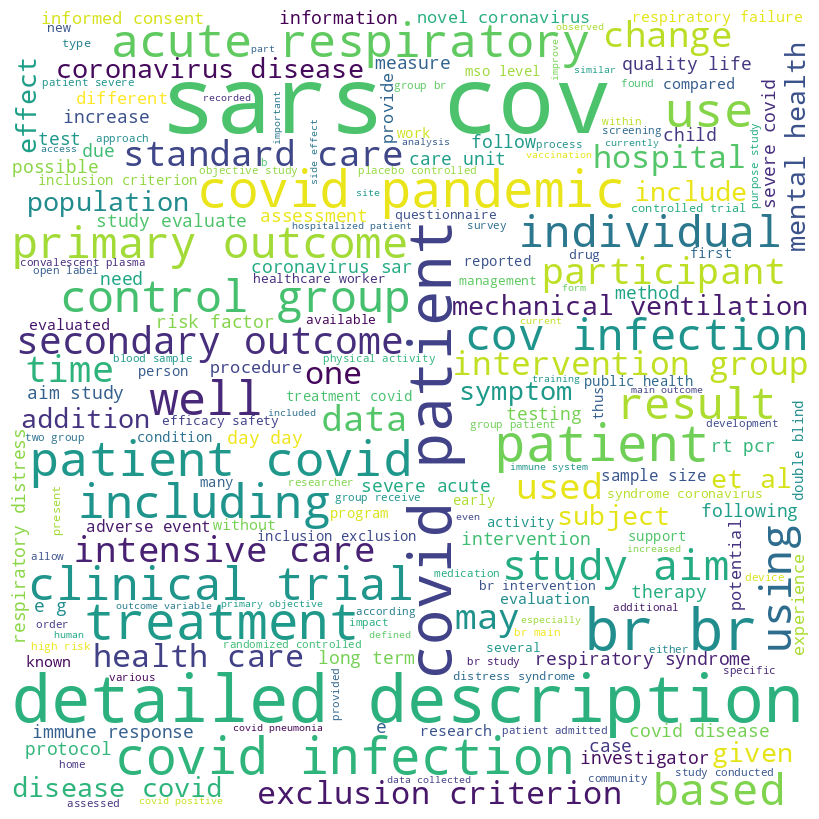

In [25]:
#Final word cloud after all the cleaning and pre-processing
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
#comment_words = ' '
stopwords = set(STOPWORDS)
from pandas.core.common import flatten

# iterate through the csv file


comment_words=flatten(x)
comment_words=' '.join(comment_words)


wordcloud = WordCloud(width = 800, height = 800,
            background_color ='white',
            stopwords = stopwords,
            min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Training skipgram model


In [26]:
# training the model

skipgram = Word2Vec(x, vector_size =50, window = 3, min_count=2,sg = 1)
print(skipgram)
skipgram.save('skipgramx1.bin')

Word2Vec<vocab=24901, vector_size=50, alpha=0.025>


In [27]:
# training the model

skipgram = Word2Vec(x, vector_size =100, window = 1, min_count=2,sg = 1)
print(skipgram)
skipgram.save('skipgramx11.bin')

Word2Vec<vocab=24901, vector_size=100, alpha=0.025>


In [28]:
# Loading the model
skipgram = Word2Vec.load('skipgramx11.bin')

# Training Fasttext model

In [29]:
#fast_n= FastText(x,vector_size=200, window=3, min_count=2, workers=5, min_n=1, max_n=2,sg=1)  #training fasttext Model, with skipgram
#fast_n=fast_n.save('fast_p.bin')    #Saving our model
fast_n = Word2Vec.load('fast_p.bin')  #Loading our pretrained model


FileNotFoundError: [Errno 2] No such file or directory: 'fast_p.bin'

In [30]:
FastText=FastText(x,vector_size=100, window=2, min_count=2, workers=5, min_n=1, max_n=2,sg=1)
FastText.save('FastText.bin')    #Saving our model
FastText = Word2Vec.load('FastText.bin')  #Loading our pretrained model

## Model embeddings - Similarity

In [31]:
# Similar words - skipgram

skipgram.wv.most_similar(positive=['corona'],topn=10)

[('coronavirus', 0.7567715048789978),
 ('covid', 0.7356648445129395),
 ('crown', 0.6961674094200134),
 ('novelty', 0.6931318044662476),
 ('covd', 0.6865873336791992),
 ('virulent', 0.6701066493988037),
 ('frightful', 0.6672655940055847),
 ('declares', 0.6630047559738159),
 ('betacoronavirus', 0.6609315276145935),
 ('suspect', 0.6605510711669922)]

In [32]:
skipgram.wv.most_similar(positive=['patient'],topn=10)

[('hospitalised', 0.7645090818405151),
 ('subject', 0.7404223084449768),
 ('acutely', 0.7370079159736633),
 ('moderately', 0.731991171836853),
 ('critically', 0.7091041803359985),
 ('participant', 0.708060622215271),
 ('chronically', 0.7054020166397095),
 ('recovering', 0.7053670883178711),
 ('individual', 0.7027850151062012),
 ('survivor', 0.6949060559272766)]

In [33]:
# Similar words - fasttext

FastText.wv.most_similar(positive=['lung'],topn=10)

[('leung', 0.7378973960876465),
 ('lungiq', 0.7236049175262451),
 ('laung', 0.7029223442077637),
 ('pulmonary', 0.6825069189071655),
 ('sung', 0.674933910369873),
 ('silicovilung', 0.6679089665412903),
 ('lag', 0.665931761264801),
 ('ltigung', 0.6653399467468262),
 ('lubricating', 0.6601173281669617),
 ('lgg', 0.6561911702156067)]

In [34]:
FastText.wv.most_similar(positive=['breathing'],topn=10)

[('breaching', 0.9218817353248596),
 ('rebreathing', 0.9185400009155273),
 ('breathe', 0.8957708477973938),
 ('breaking', 0.8742431998252869),
 ('bathing', 0.873496949672699),
 ('breathed', 0.8670926690101624),
 ('breath', 0.8638944029808044),
 ('babybreathe', 0.8593044877052307),
 ('breathable', 0.8490849733352661),
 ('bring', 0.8381590843200684)]

# PCA Plot - Skipgram

In [35]:
X = skipgram.wv[skipgram.wv.index_to_key]    #stroing arrays of all words
pca = PCA(n_components=2)                    #applying PCA to convert data into two dimensions
result = pca.fit_transform(X)

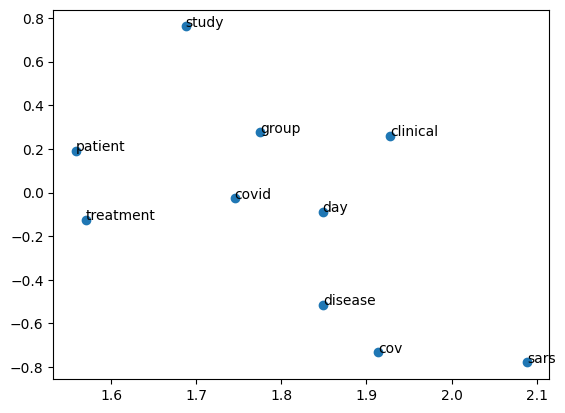

In [36]:
#words embeddings on the plot to check 2-D representation of each word
pyplot.scatter(result[:10, 0], result[:10, 1])
words = list(skipgram.wv.index_to_key)
for i, word in enumerate(words[:10]):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# PCA Plot - Fasttest

In [37]:
#same thing as above but with fasttext model
X_fast = FastText.wv[FastText.wv.index_to_key]
pca = PCA(n_components=2)
result_fast = pca.fit_transform(X_fast)

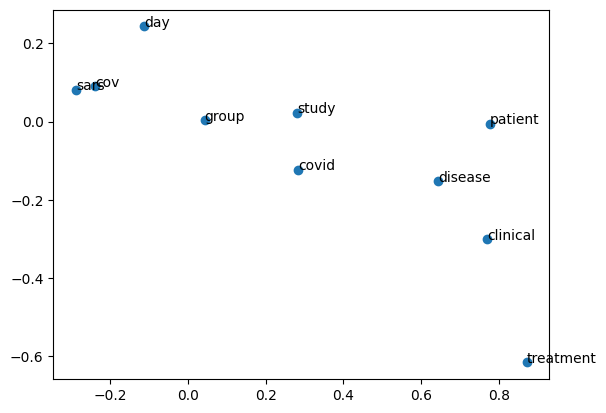

In [38]:
pyplot.scatter(result_fast[:10, 0], result_fast[:10, 1])
words = list(FastText.wv.index_to_key)
for i, word in enumerate(words[:10]):
    pyplot.annotate(word, xy=(result_fast[i, 0], result_fast[i, 1]))
pyplot.show()

# Getting Vectors for each abstract


In [39]:
vector_size=100   #defining vector size for each word

### Method 1

In [40]:
#function to take average of all vectors of each word in abstract, so that each abstract can represent (1,100) dimensional vector

K1=[]      #creating list to store vector representation of each abstract

for i in range(df.shape[0]):       #iterating through all abstract
    K=np.zeros([vector_size,1])    #creating empty array of size (vec_size,1) to add vector representation of each word
    count=0                        #creating count to check how many words are used from abstract

    for word in word_tokenize(df['Abstract'][i]):   #iterating through all words in given abstract

        if word in list(FastText.wv.index_to_key):      #if word exists in vocab , increase count by 1 and add array of given words in our defined array K

            count+=1
            K+=FastText.wv[word].reshape(vector_size,1)
    K=K/count                                        #taking average of given array
    K1.append(list(K))                               #appending vector of given abstract to the initial defined list
K1_array=np.array(K1)
K1_array=K1_array.reshape(df.shape[0],vector_size)   #converting into array of shape(no. of rows, vector_size)

In [ ]:
# Method 1 will take time to run. Method 2 is prefered.

### Method 2

In [41]:
def get_mean_vector(word2vec_model, words):
    # remove out-of-vocabulary words
    words = [word for word in tokenize(words) if word in list(word2vec_model.wv.index_to_key)] #if word is in vocab
    if len(words) >= 1:
        return np.mean(word2vec_model.wv[words], axis=0)
    else:
        return np.array([0]*100)


### Abstract to vectors using skipgram Model

In [42]:
K1=[]                                     #defining empty list
for i in df.Abstract:
    K1.append(list(get_mean_vector(skipgram, i)))     #appending array to the list


K11=pd.DataFrame(K1).transpose()    # Saving vectors of each abstract in data frame so that we can use directly while running code again
K11.to_csv('skipgram-vec.csv')

In [43]:
K=pd.read_csv('skipgram-vec.csv')   #Loading our pretrained vectors of each abstract

skipgram_vectors=[]                          #transforming dataframe into required array like structure as we did in above step
for i in range(df.shape[0]):
    skipgram_vectors.append(K[str(i)].values)


### For converting Title into vectors using skipgram

In [44]:
K1_title=[]
for i in df.Title:         #instead of abstract use title
    K1_title.append(list(get_mean_vector(skipgram, i)))


K1_title=pd.DataFrame(K1).transpose()    # Saving vectors of each abstract in data frame so that we can use directly while running code again
K1_title.to_csv('skipgram-vec-title.csv')

In [45]:
K=pd.read_csv('skipgram-vec-title.csv')   #Loading our pretrained vectors of each abstract

K2_title=[]                          #transforming dataframe into required array like structure as we did in above step
for i in range(df.shape[0]):
    K2_title.append(K[str(i)].values)

### Abstract to vector using FastText

In [46]:
K_fast=[]                                     #defining empty list
for i in df.Abstract:
    K_fast.append(list(get_mean_vector(FastText, i)))     #appending array to the list

K11=pd.DataFrame(K_fast).transpose()    # Saving vectors of each abstract in data frame so that we can use directly while running code again
K11.to_csv('FastText-vec.csv')

In [47]:
data=pd.read_csv('FastText-vec.csv')   #Loading our pretrained vectors of each abstract

fast_vectors=[]                          #transforming dataframe into required array like structure as we did in above step
for i in range(df.shape[0]):
    fast_vectors.append(data[str(i)].values)

# Cosine similarity function

In [48]:
#defining function to define cosine similarity

from numpy import dot
from numpy.linalg import norm

def cos_sim(a,b):

    return dot(a, b)/(norm(a)*norm(b))

# Input query Preprocessing

In [49]:
#Preprocessing input, because input should be in same form as training data set


def preprocessing_input(query,word2vec_model):
    query=preprocessing(query)
    query=query.replace('\n',' ')
    K=get_mean_vector(word2vec_model,query)


    return K

# Function to return 'n' similar results

In [52]:
pd.set_option("display.max_colwidth", None)       #this function will display full text from each column

In [51]:
#function to return top n similar results

#query - input query
# p - average vectors for all abs
#df1 - original

def top_n(query,p,df1,model):
    print(query)

    query=preprocessing_input(query,model)    #preprocessing input to list of vectors

    x=[]
    #Converting cosine similarities of overall data set with input queries into LIST
    for i in range(len(p)):
        x.append(cos_sim(query,p[i]))


 #store list in tmp to retrieve index
    tmp=list(x)

 #sort list so that largest elements are on the far right

    res = sorted(range(len(x)), key = lambda sub: x[sub])[-5:]
    sim=[tmp[i] for i in reversed(res)]
    print(sim)
 #get index of the 10 or n largest element
    L=[]
    for i in reversed(res):

        L.append(i)
    return df1.iloc[L, [1,2,5,6]],sim     #returning dataframe (only id,title,abstract ,publication date)

In [ ]:
#kidney
#breathing
#lung failure

## Result Evaluation

In [53]:
# skipgram model

#Input your search query here

Query = "lung failure"

Results,sim = top_n(Query,skipgram_vectors,df1,skipgram)
Results

lung failure
[0.8091563786244704, 0.802927061708444, 0.8027652470718779, 0.7994972831403211, 0.7878414709028985]


,Trial ID,Title,Abstract,Publication date
7831,2020-001807-18,"A Phase 2, Randomized, Double-Blind, Placebo-Controlled, Parallel-group, Multi-center Study of an Inhaled Pan-Janus Kinase Inhibitor, TD-0903, to Treat Symptomatic Acute Lung Injury Associated with COVID-19",Acute lung injury associated with COVID-19,2020-10-13
4235,NCT04597853,"Assessment of Lung Mechanics in SARS-CoV-2/ COVID-19 Acute Respiratory Distress Syndrome: A Holistic, Longitudinal Analysis of the Lung-heart-ventilator Interaction","This study is meant to assess the lung mechanics in SARS-CoV-2 induced acute respiratory failure. A precise characterisation of lung mechanics and heart-lung-interactions might allow a better understanding of SARS-CoV-2 induced acute respiratory failure and thus lead to better mechanical ventilation strategies. This monocentric, observational study of critically ill COVID-19 patients in the ICU, will employ impedance tomography, right-heart catheterization, oesophageal pressure measurements, indirect calorimetry as well as classic mechanical ventilation parameters to characterise the mechanical characteristics of the lung as well as the heart-lung interactions in SARS-CoV-2 induced acute respiratory failure.",2021-03-01
548,2021-000988-68,Immune response after covid-19 vaccination in patients with renal failure stadium 4 or 5 .,Renal failure stage 4 and 5.,2021-03-31
9785,2020-001236-10,"COUNTER-COVID - Oral imatinib to prevent pulmonary vascular leak in Covid19 a randomized, double --blind, placebo controlled, clinical trial in patients with severe Covid19 disease","Covid19 is characterized by hypoxemic respiratory failure, caused by extensive vascular leak and pulmonary edema early in the course of disease.",2020-12-10
10124,CHICTR2000030578,Clinical Prediction and Intervention of Pulmonary Function Impairment in Patients with Novel Coronavirus Pneumonia (COVID-19),"1. Establish a cohort of survivors of new coronavirus pneumonia, track their lung function damage and changes after discharge, and establish a predictive model of lung function impairment of new coronavirus pneumonia;\n2. Explore lung rehabilitation in patients with impaired lung function effect.",2020-02-01


In [54]:
# fasttext model

#Input your search query here

Query = "breathe"

Results,sim=top_n(Query,fast_vectors,df1,FastText)
Results

breathe
[0.7733601166217872, 0.7625322471003466, 0.7622956410557904, 0.7553100902958075, 0.7549608022336566]


,Trial ID,Title,Abstract,Publication date
3386,CHICTR2000040388,A prospective randomized control study comparing modified oropharyngeal airway with Guedel's airway for tracheal tube exchange and smooth extubation in gynecological laparoscopic surgery,"With the outbreak of COVID-19, extubation and cough in patients with perioperative intubation during recovery has become a more serious problem. Extubation under deep anesthesia can reduce the reflex of cough to a certain extent and reduce the spread of the epidemic.However, extubation under deep anesthesia may cause respiratory obstruction, and the placement of oropharyngeal airway after extubation can keep the pharynx unblocked and normal breathing.But the traditional oropharyngeal airway can induce restlessness, nausea, vomiting, coughing and even increased heart rate and blood pressure.\nIn this study, the hemodynamic fluctuation and choking were observed after the traditional oropharyngeal airway (OROPharyngeal airway) and the improved oropharyngeal airway (ORopharyngeal airway) were placed after extubation, so as to provide some evidences to support the extensive clinical application of such improved oropharyngeal airway (ORopharyngeal airway).",2020-11-01
7249,NCT04411056,Time to Adapt in the Pandemic Era: A Prospective Randomized Study Comparing Time to Intubate With and Without the Barrier Box,This study is for patients who will be having surgery and will have a breathing tube placed during intubation. The purpose of the research is to study the time it takes to use a barrier box for placement of a breathing tube. A barrier box is a clear box that sits over the head and shoulders of a patient as a breathing tube is placed. The box is used to protect the healthcare provider's exposure to coronavirus in patients who have COVID-19. The study will not include patients who test positive for COVID-19 or who are sick with COVID-19 symptoms. The researchers want to learn how long it takes to use the barrier box before it is used routinely in COVID-19 patients.\n\nDetailed Description\nThe study will have two groups of 39 patients in each group. Some patients will have a barrier box and some patients will not have a barrier box. Patients will be randomly assigned to the barrier box or no barrier box group. The study will measure the time it takes to place the breathing tube.,2020-05-07
3272,NCT04649931,Study to Evaluate Whether Differences in Exhaled Breath Can be Identified Using Ion Mobility Spectrometry (IMS) in Subjects Tested Positive for SARS-CoV-2 Infection and Subjects Tested Negative,Breath gas analysis is the evaluation of exhaled breath. It aims to evaluate the volatile organic compounds (VOCs) in exhaled breath. In this feasibility study it is intended to find specific peaks/pattern in exhaled breath indicating an infection with SARS-CoV-2 (severe acute respiratory syndrome coronavirus 2).,2020-12-14
10050,CHICTR2000030855,Study for the effect of external diaphragmatic pacing assisted invasive ventilation and weaning in patients with severe new coronavirus pneumonia,To observe whether external diaphragmatic pacing can assist in off-line extubation and reduce the rate of re-intubation in patients with severe new coronary pneumonia.,2020-02-01
1873,NCT04764032,Right Ventricular Dysfunction in Ventilated Patients With COVID-19,"Using echocardiography to investigate the incidence of RV dysfunction in ventilated patients with COVID-19.\n\nDetailed Description\nINTRODUCTION Following the first reported cases in China, there has been a worldwide pandemic of a new virus commonly known as, Coronavirus. The virus causes a number of conditions including; cough, high temperature, painful muscles and breathing difficulties. The disease the virus causes is known as Coronavirus Disease 2019 (COVID-19). In the majority of cases these symptoms will get better without any treatment and without needing admission to hospital. In a small proportion of cases, the symptoms can be so bad tha

# Streamlit App

In [55]:
#streamlit function
def main():
    # Load data and models
    data = df1     #our data which we have to display
    model = top_n  #top_n model to return n similar results


    st.title("Medical Search engine")      #title of our app
    st.write('Type your query here')       #text below title

    # User search
    user_input = st.text_input("Search box")   #getting input from user


    # Fetch results
    if user_input:

        P,sim =model(str(user_input),K2,data)     #storing our output dataframe in P
        #Plotly function to display our dataframe in form of plotly table
        fig = go.Figure(data=[go.Table(header=dict(values=['ID', 'Title','Abstract','Publication Date','Similarity']),cells=dict(values=[list(P['Trial ID'].values),list(P['Title'].values), list(P['Abstract'].values),list(P['Publication date'].values),list(np.around(sim,4))],align='center'))])
        #displying our plotly table
        fig.update_layout(height=1700)
        st.plotly_chart(fig)
        # Get individual results


if __name__ == "__main__":
    main()

2025-01-13 13:00:33.282 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 13:00:33.380 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-01-13 13:00:33.383 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 13:00:33.386 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 13:00:33.389 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 13:00:33.392 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 13:00:33.393 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-13 13:00:33.395 Thread 'MainThread': mi